# Multiple Models Analysis

In [3]:
import sys, os
sys.path.append('/home/jupyterhubadmin/.virtualenvs/meow/local/lib/python2.7/site-packages/')
sys.path.append('/home/mazhang/DLKit')
os.chdir('../../')

In [4]:
# Import Everything we need
#import setup

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels/*.1"))
ModelDirs=glob.glob("/home/mazhang/DLKit/CaloDNN/NeuralNets/Cache/Dense_GammaPi0_50Epochs/Model/*")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [6]:
# Prep the Models

# Rename the Models using Width and Depth
#ResetNames(MyModels,["Width","Depth","lr","decay","optimizer"])
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: []


In [7]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'Epochs', 'decay', 'lr', 'HyperParamSet']


In [8]:
# Make a Table of all relevant parameter
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'optimizer', "lr","decay",'Pi0_AUC','Gamma_AUC'],[4,5])

Model Name        optimizer        lr    decay    Pi0_AUC  Gamma_AUC
----------------  -----------  ------  -------  ---------  -----------
Width=32 Depth=1  'RMSprop'    0.0100   0.0100     0.7964  N/A


In [9]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
def AnalyzeSubset(expression,labels=["Width","Depth","lr","decay"]):
    ResetNames(MyModels,labels)
    M1=SelectModels(MyModels,MetaDataEvaluator(expression,params=["optimizer"]))
    print "Number of Models:",len(M1)
    ScanTable(M1,['Model Name','Pi0_AUC','Gamma_AUC',"FinalScore[0]"],[1,2])
    ResetNames(MyModels,["Width","Depth","lr","decay",'Pi0_AUC','Gamma_AUC'])
    PlotMetaDataMany(M1,4,
                     [["History","loss"],["History","val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")
    
AnalyzeSubset("optimizer=='Adam'")
#AnalyzeSubset("optimizer=='RMSprop'")
#AnalyzeSubset("optimizer=='SGD'")

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


Number of Models: 1
Model Name                             Pi0_AUC  Gamma_AUC      FinalScore[0]
-----------------------------------  ---------  -----------  ---------------
Width=32 Depth=1 lr=0.01 decay=0.01     0.7964  N/A                   0.5778


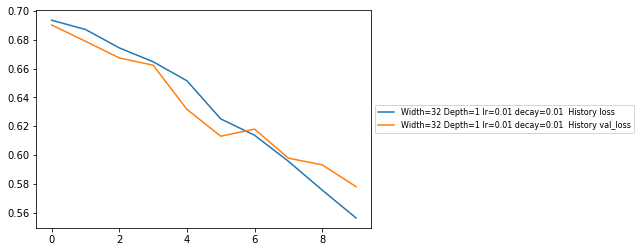

In [10]:
AnalyzeSubset("optimizer=='RMSprop'")

In [11]:
AnalyzeSubset("optimizer=='SGD'")

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


Number of Models: 1
Model Name                             Pi0_AUC  Gamma_AUC      FinalScore[0]
-----------------------------------  ---------  -----------  ---------------
Width=32 Depth=1 lr=0.01 decay=0.01     0.7964  N/A                   0.5778


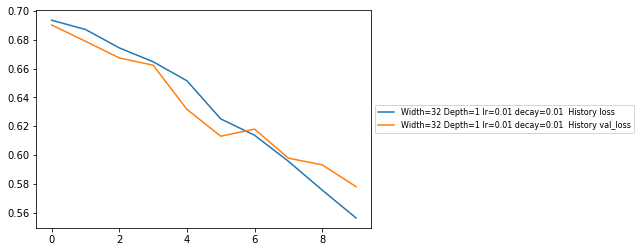

In [12]:
AnalyzeSubset("lr==0.01")

In [13]:
AnalyzeSubset("lr==0.001")

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


Number of Models: 1
Model Name                             Pi0_AUC  Gamma_AUC      FinalScore[0]
-----------------------------------  ---------  -----------  ---------------
Width=32 Depth=1 lr=0.01 decay=0.01     0.7964  N/A                   0.5778


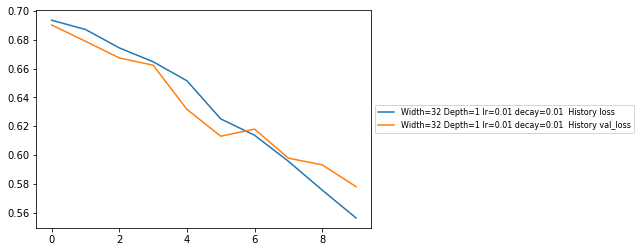

In [14]:
AnalyzeSubset("decay==0.01")

In [15]:
#AnalyzeSubset("optimizer=='RMSprop' and lr==0.01 and decay==0.001")
AnalyzeSubset("optimizer=='Adam' and lr==0.001 and decay==0.01")

# Compare Number of Epochs each model ran (only last run)
#PlotMetaData(MyModels,["Epochs"])

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


In [16]:
AnalyzeSubset("Pi0_AUC> 0.85 and Gamma_AUC>0.85", labels=["Width","Depth","lr","decay","optimizer","HyperParamSet"])



Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


In [17]:
def AnalyzeSubsetAcc(expression,labels=["Width","Depth","lr","decay"]):
    ResetNames(MyModels,labels)
    M1=SelectModels(MyModels,MetaDataEvaluator(expression,params=["optimizer"]))
    print "Number of Models:",len(M1)
    ScanTable(M1,['Model Name','Pi0_AUC','Gamma_AUC',"FinalScore[0]"],[1,2])
    ResetNames(MyModels,["Width","Depth","lr","decay",'Pi0_AUC','Gamma_AUC'])
    PlotMetaDataMany(M1,4,
                     [["History","acc"],["History","val_acc"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

In [18]:
AnalyzeSubsetAcc("optimizer=='Adam'")

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


In [19]:
AnalyzeSubsetAcc("Pi0_AUC> 0.85 and Gamma_AUC>0.85", labels=["Width","Depth","lr","decay","optimizer","HyperParamSet"])

Number of Models: 0
Model Name    Pi0_AUC    Gamma_AUC    FinalScore[0]
------------  ---------  -----------  ---------------


Pi0_AUC


ValueError: zero-size array to reduction operation minimum which has no identity

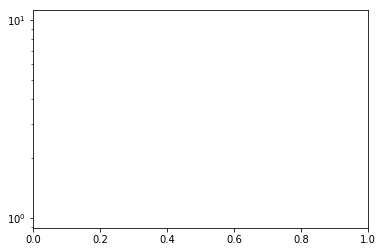

In [20]:
# Compare AUCs
for p in ['Pi0_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(SelectModels(MyModels,MetaDataEvaluator("optimizer=='Adam'",params=["optimizer"])),[p],log=True)
    plt.show()

ValueError: min() arg is an empty sequence

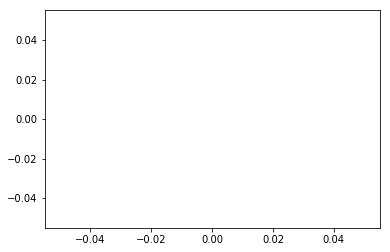

In [21]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==64, MyModels), ["History","val_loss"],loc=0)

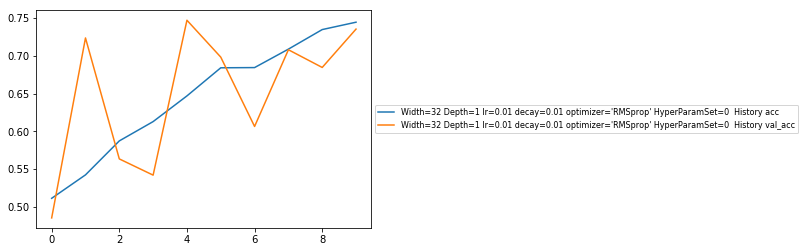

In [22]:
PlotMetaDataMany(MyModels,4,[["History","acc"],["History","val_acc"]],loc="center left")

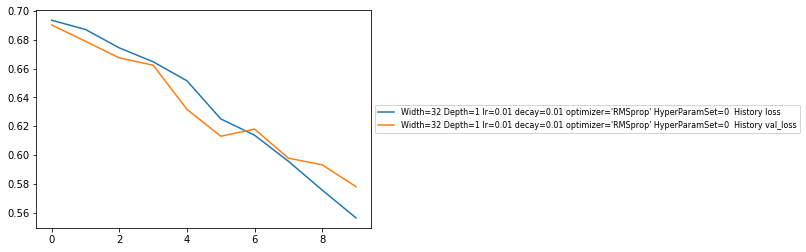

In [23]:
PlotMetaDataMany(MyModels,4,[["History","loss"],["History","val_loss"]],loc="center left")

In [24]:
# Plot a varible for all trainings. This was pulled together above.
#PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")

In [25]:
#PlotMetaData(SelectModels(MyModels,lambda(m): m.MetaData["lr"]==0.01),["All_History.val_loss"],loc="center left")

In [26]:
#MyModels[0].MetaData["lr"]


In [27]:
MyModels[0].MetaData["Epochs"]

20

In [28]:
#len(MyModels[0].MetaData)

In [29]:
#MyModels[0].MetaData.keys()

In [22]:
#PlotMetaDataMany(MyModels,2,[["History","acc"],["History","val_acc"]],loc="center left")

In [23]:
#PlotMetaData(MyModels, ["History","acc"],loc=0)